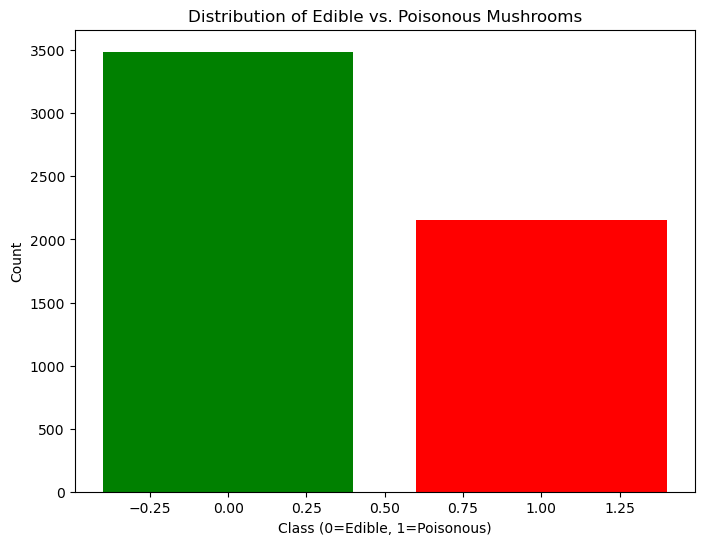

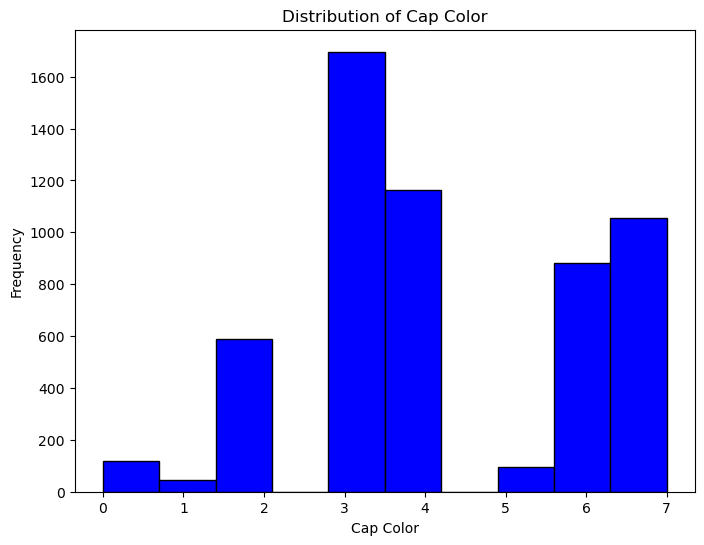

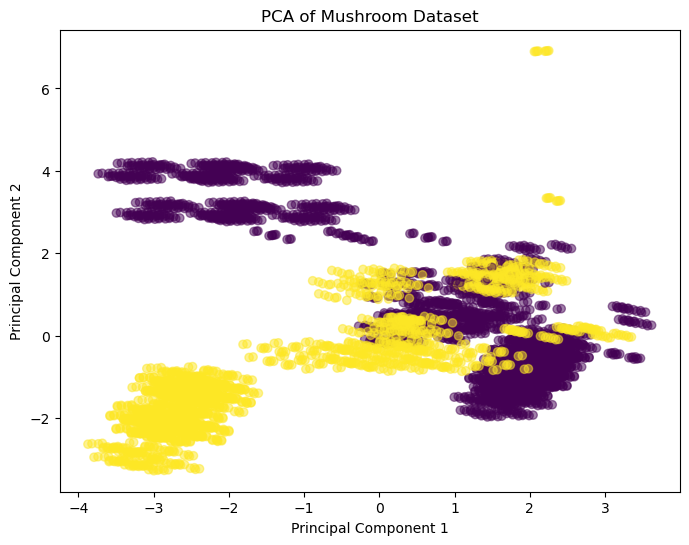

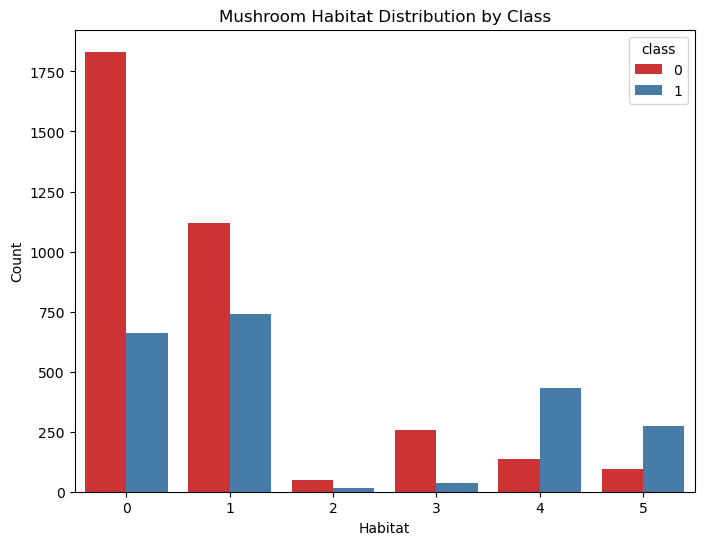

C:\Users\MY_Home\AppData\Local\Temp\ipykernel_13412\2377125528.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='cap_color', data=data, palette='Set2')


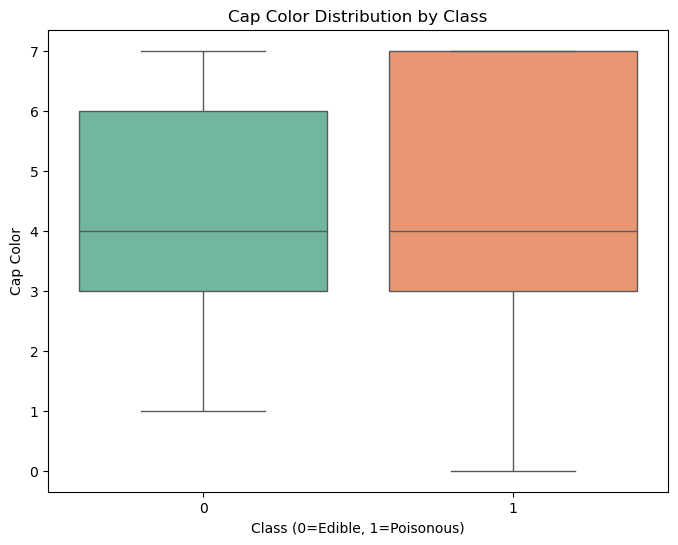

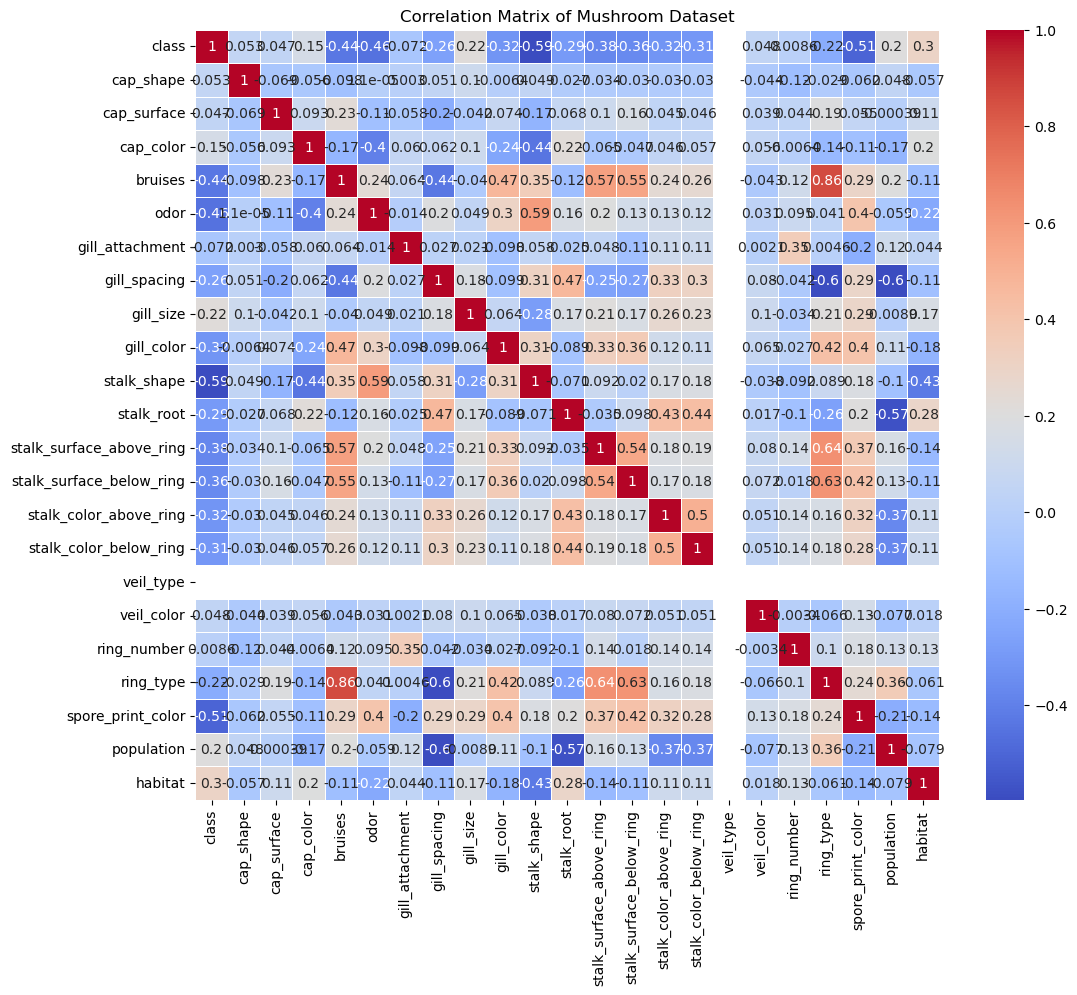

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
           'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
           'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
           'stalk_surface_below_ring', 'stalk_color_above_ring',
           'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
           'ring_type', 'spore_print_color', 'population', 'habitat']
data = pd.read_csv(url, header=None, names=columns)

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.drop_duplicates(inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('class', axis=1))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['class'] = data['class'].values


class_counts = data['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Class (0=Edible, 1=Poisonous)')
plt.ylabel('Count')
plt.title('Distribution of Edible vs. Poisonous Mushrooms')
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(data['cap_color'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Cap Color')
plt.ylabel('Frequency')
plt.title('Distribution of Cap Color')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['class'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mushroom Dataset')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='habitat', hue='class', data=data, palette='Set1')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.title('Mushroom Habitat Distribution by Class')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='cap_color', data=data, palette='Set2')
plt.xlabel('Class (0=Edible, 1=Poisonous)')
plt.ylabel('Cap Color')
plt.title('Cap Color Distribution by Class')
plt.show()


plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Mushroom Dataset')
plt.show()
